# COURSE: A deep understanding of deep learning
## SECTION: ANNs
### LECTURE: ANN for regression
#### TEACHER: Mike X Cohen, sincxpress.com
##### COURSE URL: udemy.com/course/dudl/?couponCode=202208

In [2]:
# import libraries
import numpy as np
import torch
import torch.nn as nn
import matplotlib.pyplot as plt
from IPython import display
display.set_matplotlib_formats('svg')


/tmp/ipykernel_4099/2215061726.py:7: DeprecationWarning: `set_matplotlib_formats` is deprecated since IPython 7.23, directly use `matplotlib_inline.backend_inline.set_matplotlib_formats()`
  display.set_matplotlib_formats('svg')


In [3]:
class SimpleRegressionModel():
    def __init__(self, learningRate, numofepochs):
        self.learningRate = learningRate
        self.numofepochs = numofepochs
        self.lossfun = nn.MSELoss()
        self.net = nn.Sequential(
            nn.Linear(1, 1),  # input layer
            nn.ReLU(),       # activation function
            nn.Linear(1, 1)   # output layer
        )
        self.optimizer = torch.optim.Adam(
            self.net.parameters(), lr=self.learningRate)
        self.losses = torch.zeros(self.numofepochs)

    def train(self, x, y):
        # Train the model!
        # loss = THRESHOLD
        # epochi = 0
        # while loss >= THRESHOLD and epochi < NUMOFEPOCHS:
        for epochi in range(self.numofepochs):
            # forward pass
            yHat = self.net(x)

            # compute loss
            loss = self.lossfun(yHat, y)
            self.losses[epochi] = loss

            # backprop
            self.optimizer.zero_grad()
            loss.backward()
            self.optimizer.step()
            # epochi+=1
        self.losses = self.losses[:epochi]

    def eval(self, x, y):
        preds = self.net(x)
        return preds, self.lossfun(preds, y)


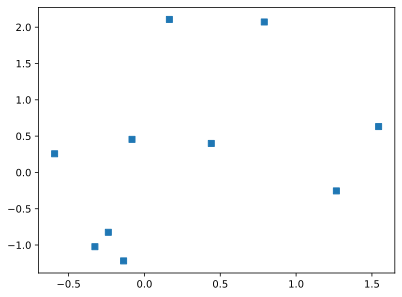

In [5]:
# create data
N = 10
x = torch.randn(N, 1)
y = x + torch.randn(N, 1)

# learning rate
learningRate = .05

# THRESHOLD = .1
NUMOFEPOCHS = 100
REPEAT = 50

# and plot
plt.plot(x, y, 's')
plt.show()


In [14]:
def test(N, noise, m=1, times=1):
    x = torch.randn(N, 1)
    y = m*x + torch.randn(N, 1)*noise
    losses = torch.zeros(times)
    accs = np.zeros(times)
    for lossIndex in range(times):
        simpleRegressionModel = SimpleRegressionModel(
            learningRate, NUMOFEPOCHS)
        simpleRegressionModel.train(x, y)
        preds, testloss = simpleRegressionModel.eval(x, y)
        losses[lossIndex] = testloss.item()
        accs[lossIndex] = np.corrcoef(y.T, preds.detach().T)[0, 1]
    return losses, accs


def testFor(Ns, noises):
    lossmeans = torch.zeros(len(Ns), len(noises))
    lossvars = torch.zeros(len(Ns), len(noises))

    for iN in range(len(Ns)):
        for jnoises in range(len(noises)):
            losses = test(Ns[iN], noises[jnoises], REPEAT)
            lossmeans[iN][jnoises] = losses.mean()
            lossvars[iN][jnoises] = losses.var()

    return lossmeans, noises, Ns


In [ ]:
lossmeans, noises, Ns = testFor(torch.arange(
    10, 51, 10), torch.linspace(.5, 2, 10))


In [37]:

ms = torch.linspace(-2, 2, 21)

losses = torch.zeros(len(ms))
accs = torch.zeros(len(ms))
for i, m in enumerate(ms):
    losses_tmp = torch.zeros(REPEAT)
    accs_tmp = torch.zeros(REPEAT)
    for j in range(REPEAT):
        tmp = test(50, .5, m)
        losses_tmp[j], accs_tmp[j] = tmp[0].item(), tmp[1].item()
    losses[i] = losses_tmp.nanmean()
    accs[i] = accs_tmp.nanmean()


/home/polyester/.venv/datascience/lib/python3.10/site-packages/numpy/lib/function_base.py:2853: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/home/polyester/.venv/datascience/lib/python3.10/site-packages/numpy/lib/function_base.py:2854: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


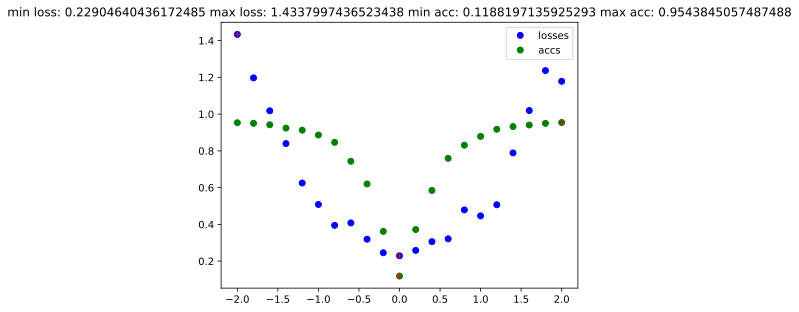

In [38]:
minLoss = np.nanmin(losses.numpy())
maxLoss = np.nanmax(losses.numpy())
minAcc = np.nanmin(accs.numpy())
maxAcc = np.nanmax(accs.numpy())
plt.plot(ms, losses, "bo")
plt.plot(ms, accs, "go")
plt.plot(ms[np.nanargmin(losses.numpy())], minLoss, "r+")
plt.plot(ms[np.nanargmax(losses.numpy())], maxLoss, "r+")
plt.plot(ms[np.nanargmin(accs.numpy())], minAcc, "r+")
plt.plot(ms[np.nanargmax(accs.numpy())], maxAcc, "r+")
plt.legend(["losses", "accs"])
plt.title(
    f"min loss: {minLoss} max loss: {maxLoss} min acc: {minAcc} max acc: {maxAcc}")
plt.show()


In [1]:
plt.axes([0, 0, 10, 1])
plt.imshow(lossmeans, extent=[noises[0], noises[-1],
           Ns[0], Ns[-1]], origin='lower', aspect=.04)
plt.colorbar()
plt.xlabel('noise')
plt.ylabel('N')
plt.xticks(noises)
plt.yticks(Ns)
plt.show()


NameError: name 'plt' is not defined

In [7]:
from scipy import stats

t, p = stats.ttest_ind(lossmeans[0][0], lossmeans[1][0])


/tmp/ipykernel_114552/3176094344.py:3: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  t,p = stats.ttest_ind(lossmeans[0][0], lossmeans[1][0])
/home/polyester/.venv/datascience/lib/python3.10/site-packages/scipy/stats/_stats_py.py:1250: RuntimeWarning: divide by zero encountered in divide
  var *= np.divide(n, n-ddof)  # to avoid error on division by zero
/home/polyester/.venv/datascience/lib/python3.10/site-packages/scipy/stats/_stats_py.py:1250: RuntimeWarning: invalid value encountered in double_scalars
  var *= np.divide(n, n-ddof)  # to avoid error on division by zero


In [8]:
print(lossmeans[0][0], lossmeans[1][0])


tensor(0.3968) tensor(0.7247)


# Additional explorations

In [6]:
# 1) How much data is "enough"? Try different values of N and see how low the loss gets.
#    Do you still get low loss ("low" is subjective, but let's say loss<.25) with N=10? N=5?
#
# 2) Does your conclusion above depend on the amount of noise in the data? Try changing the noise level
#    by changing the division ("/2") when creating y as x+randn.
#
# 3) Notice that the model doesn't always work well. Put the original code (that is, N=30 and /2 noise)
#    into a function or a for-loop and repeat the training 100 times (each time using a fresh model instance).
#    Then count the number of times the model had a loss>.25.
